In [7]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Loading the data.
def load_data(dataset = 'Linear1', folder_path = '../Datasets/Final Datasets/'):
    data_path = folder_path + str(dataset) + '.csv'

    if os.path.isfile(data_path):
        data = pd.read_csv(data_path)
    else:
        print("Path Not Found")

    return data

In [8]:
linear_df = load_data()
#cleaning empty columns
linear_df.dropna(axis=1, how='all', inplace=True)

features = linear_df.drop(columns=['DATE','GDP'])
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

In [9]:
#use XGBRegressor
XGBoost_model = XGBRegressor()
XGBoost_model.fit(X_train, y_train)

y_pred = XGBoost_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999965854792237
mse: 181.8881279639997
mae: 8.9719044507362


In [10]:
#cross validation 
cross_validation_score_xgb = cross_val_score(XGBoost_model, X_train, y_train, cv=5, scoring='r2')
print(f"Gradient boosting cross validation scores for R^2: {cross_validation_score_xgb}")

Gradient boosting cross validation scores for R^2: [0.99999581 0.99999434 0.9999955  0.99999558 0.99999335]


In [11]:
#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
print('Best estimator:', grid_search.best_estimator_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500}
Best score: 0.9999989114120558
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
#use the best parameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

best_features = [
    'All Employees: Retail Trade', 
    'CPI for All Urban Consumers: All Items', 
    'Federal Debt: Total Public Debt', 
    'Industrial Production', 
    'Money Supply: M2', 
    'Population', 
    'Real_Estate_Loans_All_Commercial_Banks_Daily', 
    'Real_Personal_Consumption_Expenditures_Daily', 
    'Real_Government_Consumption_Expenditures_and_Gross_Investment', 
    'Real_Gross_Private_Domestic_Investment', 
    'Real_Final_Sales_to_Private_Domestic_Purchasers_Daily', 
    'Real_Disposable_Personal_Income_Daily', 
    'Personal_Consumption_Expenditures_Durable_Goods_Daily', 
    'Domestic_Nonfinancial_Sectors_Debt_Securities_and_Loans_Liability_Level_Daily', 
    'All_Employees_Total_Nonfarm_Daily', 
    'Commercial_and_Industrial_Loans_All_Commercial_Banks_Daily'
]

R2 Score: 0.9999993569881155
mse: 34.25260398079523
mae: 2.6191236154942796


## Using the best features from eda

17


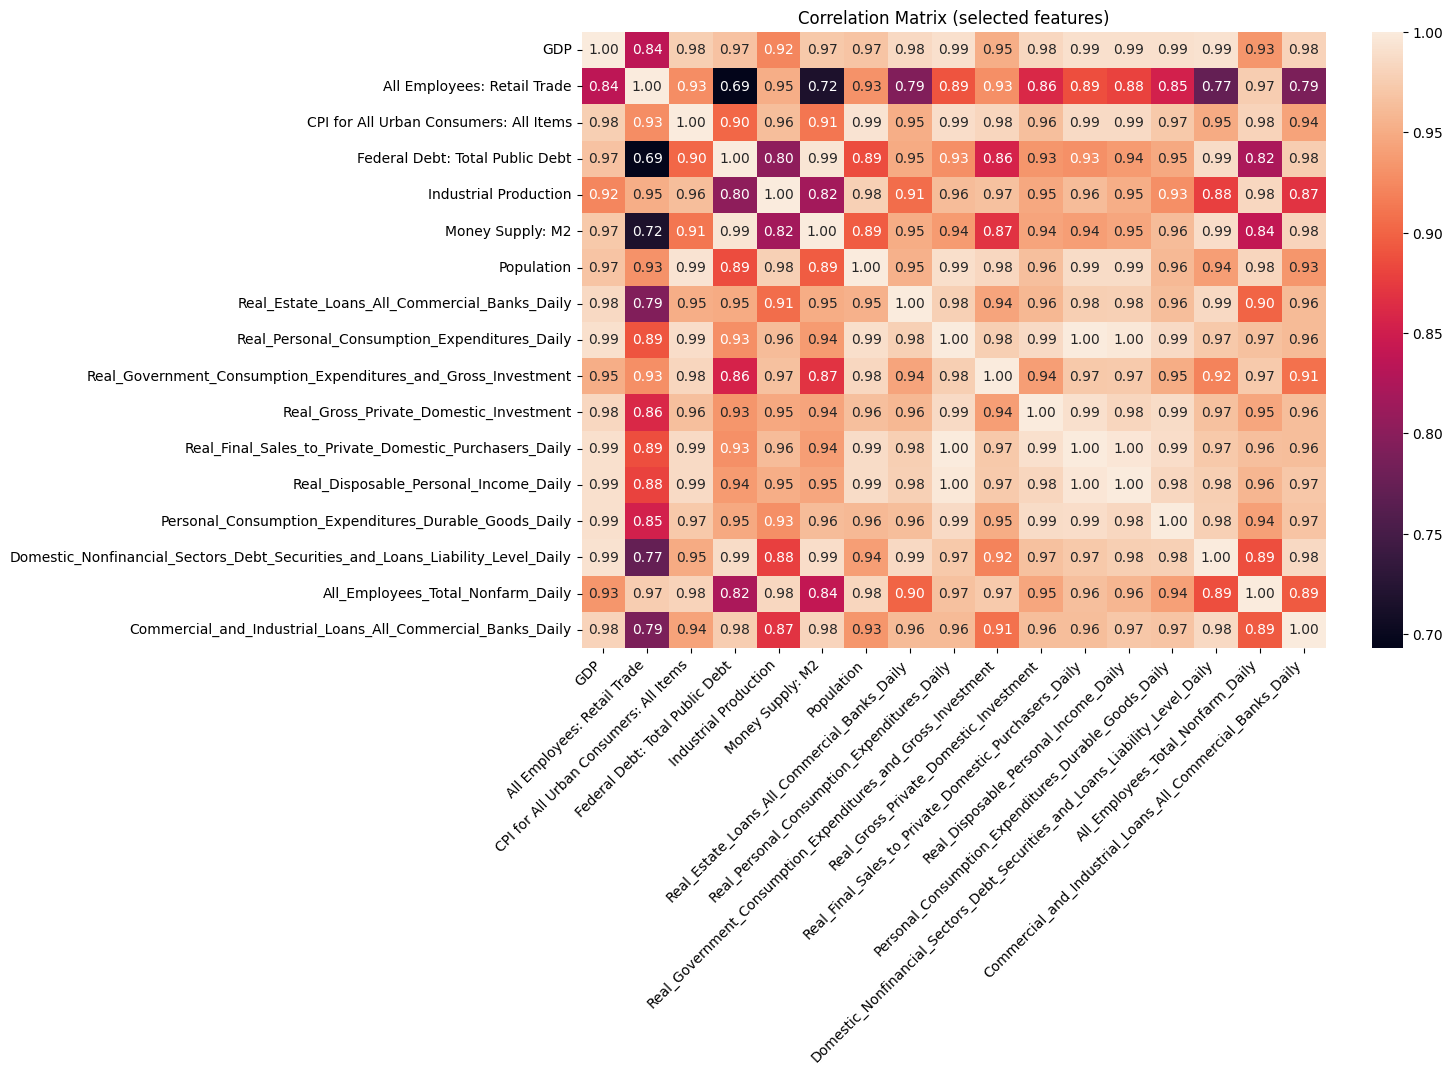

In [47]:
#correlation natrix for the selected features from eda
best_features = [
    'GDP',
    'USTRADE', 
    'CPIAUCSL', 
    'GFDEBTN', 
    'INDPRO', 
    'M2SL', 
    'POPTHM', 
    'Real_Estate_Loans_All_Commercial_Banks_Daily', 
    'Real_Personal_Consumption_Expenditures_Daily', 
    'Real_Government_Consumption_Expenditures_and_Gross_Investment', 
    'Real_Gross_Private_Domestic_Investment', 
    'Real_Final_Sales_to_Private_Domestic_Purchasers_Daily', 
    'Real_Disposable_Personal_Income_Daily', 
    'Personal_Consumption_Expenditures_Durable_Goods_Daily', 
    'Domestic_Nonfinancial_Sectors_Debt_Securities_and_Loans_Liability_Level_Daily', 
    'All_Employees_Total_Nonfarm_Daily', 
    'Commercial_and_Industrial_Loans_All_Commercial_Banks_Daily'
]

print(len(best_features))
import matplotlib.pyplot as plt
import seaborn as sns

# New labels for the features
labels = [
    'GDP',
    'All Employees: Retail Trade', 
    'CPI for All Urban Consumers: All Items', 
    'Federal Debt: Total Public Debt', 
    'Industrial Production', 
    'Money Supply: M2', 
    'Population', 
    'Real_Estate_Loans_All_Commercial_Banks_Daily', 
    'Real_Personal_Consumption_Expenditures_Daily', 
    'Real_Government_Consumption_Expenditures_and_Gross_Investment', 
    'Real_Gross_Private_Domestic_Investment', 
    'Real_Final_Sales_to_Private_Domestic_Purchasers_Daily', 
    'Real_Disposable_Personal_Income_Daily', 
    'Personal_Consumption_Expenditures_Durable_Goods_Daily', 
    'Domestic_Nonfinancial_Sectors_Debt_Securities_and_Loans_Liability_Level_Daily', 
    'All_Employees_Total_Nonfarm_Daily', 
    'Commercial_and_Industrial_Loans_All_Commercial_Banks_Daily'
]

selected_features_df = linear_df[best_features]
correlation_matrix = selected_features_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', xticklabels=new_labels, yticklabels=new_labels)
plt.title('Correlation Matrix (selected features)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
best_features = [
    'USTRADE', 
    'CPIAUCSL', 
    'GFDEBTN', 
    'INDPRO', 
    'M2SL', 
    'POPTHM', 
    'Real_Estate_Loans_All_Commercial_Banks_Daily', 
    'Real_Personal_Consumption_Expenditures_Daily', 
    'Real_Government_Consumption_Expenditures_and_Gross_Investment', 
    'Real_Gross_Private_Domestic_Investment', 
    'Real_Final_Sales_to_Private_Domestic_Purchasers_Daily', 
    'Real_Disposable_Personal_Income_Daily', 
    'Personal_Consumption_Expenditures_Durable_Goods_Daily', 
    'Domestic_Nonfinancial_Sectors_Debt_Securities_and_Loans_Liability_Level_Daily', 
    'All_Employees_Total_Nonfarm_Daily', 
    'Commercial_and_Industrial_Loans_All_Commercial_Banks_Daily'
]

best_features_df = linear_df[best_features]
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(best_features_df)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

In [15]:
#use XGBRegressor
XGBoost_model = XGBRegressor()
XGBoost_model.fit(X_train, y_train)

y_pred = XGBoost_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.999996419190388
mse: 190.74616896435182
mae: 9.561426669967569


In [45]:
#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
print('Best estimator:', grid_search.best_estimator_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500}
Best score: 0.9999990524020161
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [46]:
#use the best parameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999994110939054
mse: 31.37044232738388
mae: 2.88310989523878


## Running on lagged datasets


In [ ]:
best_features = [
    'USTRADE', 
    'CPIAUCSL', 
    'GFDEBTN', 
    'INDPRO', 
    'M2SL', 
    'POPTHM', 
    'Real_Estate_Loans_All_Commercial_Banks_Daily', 
    'Real_Personal_Consumption_Expenditures_Daily', 
    'Real_Government_Consumption_Expenditures_and_Gross_Investment', 
    'Real_Gross_Private_Domestic_Investment', 
    'Real_Final_Sales_to_Private_Domestic_Purchasers_Daily', 
    'Real_Disposable_Personal_Income_Daily', 
    'Personal_Consumption_Expenditures_Durable_Goods_Daily', 
    'Domestic_Nonfinancial_Sectors_Debt_Securities_and_Loans_Liability_Level_Daily', 
    'All_Employees_Total_Nonfarm_Daily', 
    'Commercial_and_Industrial_Loans_All_Commercial_Banks_Daily'
]

#for file with lagged dataset early 2 months
linear_df = load_data('2_Y_Lag', '../Datasets/Lagged/')
linear_df.dropna(axis=1, how='all', inplace=True)
linear_df.dropna(axis=0, how='all', inplace=True)

best_features_df = linear_df[best_features]
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(best_features_df)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

#use XGBRegressor
XGBoost_model = XGBRegressor()

#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500, 800], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

#use the best parameters
model_lagged_early_2 = grid_search.best_estimator_
model_lagged_early_2.fit(X_train, y_train)
y_pred = model_lagged_early_2.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999989386008677
mse: 56.911507191961235
mae: 3.4672822449869103


In [17]:
#for file with lagged dataset early 6 months
linear_df = load_data('6_M_Lag', '../Datasets/Lagged/')
linear_df.dropna(axis=1, how='all', inplace=True)
linear_df.dropna(axis=0, how='all', inplace=True)

best_features_df = linear_df[best_features]
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(best_features_df)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)
#use XGBRegressor
XGBoost_model = XGBRegressor()

#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500, 800], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

#use the best parameters
model_lagged_early_6 = grid_search.best_estimator_
model_lagged_early_6.fit(X_train, y_train)
y_pred = model_lagged_early_6.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999982021134258
mse: 97.73919640749598
mae: 3.2133260303780764
